## Final Project: Book Recommender

### Phase 2: Data Cleaning and Exploratory Data Analysis

For this portion of the data cleaning and EDA, we will be working on 3 datasets 

##### Importing the correct librairies

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### First dataset to clean

In [2]:
data3 = pd.read_csv('data3.csv')
data3

,title,author,rating,genre,description,year_published,isbn,page_count,image_link
0,Gilead,Marilynne Robinson,3.85,Fiction,A NOVEL THAT READERS and critics have been eag...,2004.0,9780002005883,247.0,http://books.google.com/books/content?id=KQZCP...
1,Spider's Web,Charles Osborne;Agatha Christie,3.83,Detective and mystery stories,A new 'Christie for Christmas' -- a full-lengt...,2000.0,9780002261982,241.0,http://books.google.com/books/content?id=gA5GP...
2,The One Tree,Stephen R. Donaldson,3.97,American fiction,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,9780006163831,479.0,http://books.google.com/books/content?id=OmQaw...
3,Rage of angels,Sidney Sheldon,3.93,Fiction,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,9780006178736,512.0,http://books.google.com/books/content?id=FKo2T...
4,The Four Loves,Clive Staples Lewis,4.15,Christian life,Lewis' work on the nature of love divides love...,2002.0,9780006280897,170.0,http://books.google.com/books/content?id=XhQ5X...
...,...,...,...,...,...,...,...,...,...
6805,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,4.51,Philosophy,This collection of the timeless teachings of o...,1999.0,9788185300535,531.0,http://books.google.com/books/content?id=Fv_JP...
6806,Secrets Of The Heart,Khalil Gibran,4.08,Mysticism,NaN,1993.0,9788185944609,74.0,http://books.google.com/books/content?id=XcrVp...
6807,Fahrenheit 451,Ray Bradbury,3.98,Book burning,NaN,2004.0,9788445074879,186.0,NaN
6808,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,0.00,History,Since the three volume edition ofHegel's Philo...,1981.0,9789027712059,210.0,http://books.google.com/books/content?id=Vy7Sk...


I will deal the the NaNs values for "author", "rating", "genre", "description", and "image_link" columns once all 3 datasets have been concatenated rather on an individual dataset basis. 

In [3]:
data3.isna().sum()

title               0
author             72
rating             43
genre              99
description       262
year_published      6
isbn                0
page_count         43
image_link        329
dtype: int64

In [4]:
data3 = data3.dropna()

Looking at the year_published unique values.I knew beforehand that this column was going to take time to clean, therefore I wanted to clean it per column, and not after all 3 datasets were concatenated as the overall was going to be 50K+ rows

In [5]:
data3['year_published'].unique()

array([2004., 2000., 1982., 1993., 2002., 1977., 1998., 1994., 1996.,
       1995., 2003., 1997., 2001., 2007., 2005., 2006., 1970., 1986.,
       1979., 1966., 1991., 1978., 1962., 1992., 1981., 1963., 1999.,
       1953., 1989., 1988., 1990., 1965., 1984., 1945., 1985., 1964.,
       1968., 1976., 1980., 1972., 1943., 1969., 1940., 1967., 1987.,
       2008., 1973., 1949., 1959., 1961., 1975., 1983., 1876., 1955.,
       1939., 1958., 1927., 1952., 1974., 1960., 1950., 1948., 1957.,
       1971., 2012., 2017., 1956., 2009., 1946., 1938., 1941., 2015.,
       2010., 2014., 2011., 1925., 1942., 2013., 1929., 1934., 1951.,
       1944., 2019., 1930., 1936., 1926., 1928., 1954.])

In [6]:
data3['year_published'].value_counts(dropna=False)

2006.0    847
2005.0    652
2004.0    575
2003.0    547
2002.0    450
         ... 
1948.0      1
1927.0      1
1943.0      1
1945.0      1
1954.0      1
Name: year_published, Length: 88, dtype: int64

Dropping all NaNs as file is too big for recommender

In [7]:
data3['year_published'] = data3['year_published'].astype(int)

In [8]:
data3['page_count'].unique()

array([ 247.,  241.,  479.,  512.,  170.,  176.,  560.,  608.,  743.,
        489.,  501.,  460.,  522.,  823.,  337.,  368.,  352.,  576.,
        906.,  474.,  261.,  359.,  772.,  317.,  342.,  640.,  586.,
        224.,  495.,   32.,  239.,  634.,  347.,  264.,   72.,  279.,
        333.,  303.,  336.,  335.,  272.,  315.,  284.,  382.,  351.,
        328.,  384.,  365.,  400.,  207.,  173., 1200.,  410.,  527.,
        178.,  414.,  242.,  306.,  396.,   48.,  208.,  554.,  386.,
         64.,   36.,  371.,  320.,  454.,  727.,  388.,  240.,  289.,
        318.,  169.,  203.,  216.,  499.,   85.,  288.,  256.,   40.,
        314.,  390.,  377.,  847.,  357.,  354.,  266.,  502.,  225.,
        198.,  209.,  104.,  112.,  128.,   80.,  341.,  928.,  278.,
        416.,  448., 1139.,  387.,  360.,  186.,  321.,  404.,   90.,
        286.,  267.,  142.,  205.,  417.,  464.,  592.,  672.,  650.,
        327.,  442.,  213.,   96.,  192.,  296.,  419.,  453.,  311.,
        385.,  375.,

In [9]:
data3['page_count'] = data3['page_count'].astype(int)

In [10]:
data3.dtypes

title              object
author             object
rating            float64
genre              object
description        object
year_published      int64
isbn                int64
page_count          int64
image_link         object
dtype: object

##### Working on the 2nd Kaggle dataset

In [11]:
data5 = pd.read_csv('data5.csv')
data5

,title,author,rating,genre,description,year_published,isbn,page_count,image_link
0,The Hunger Games,Suzanne Collins,4.33,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,09/14/08,9780439023481,374,https://i.gr-assets.com/images/S/compressed.ph...
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",There is a door at the end of a silent corrido...,09/28/04,9780439358071,870,https://i.gr-assets.com/images/S/compressed.ph...
2,To Kill a Mockingbird,Harper Lee,4.28,"['Classics', 'Fiction', 'Historical Fiction', ...",The unforgettable novel of a childhood in a sl...,05/23/06,9999999999999,324,https://i.gr-assets.com/images/S/compressed.ph...
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,"['Classics', 'Fiction', 'Romance', 'Historical...",Alternate cover edition of ISBN 9780679783268S...,10/10/00,9999999999999,279,https://i.gr-assets.com/images/S/compressed.ph...
4,Twilight,Stephenie Meyer,3.60,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",About three things I was absolutely positive.\...,09/06/06,9780316015844,501,https://i.gr-assets.com/images/S/compressed.ph...
...,...,...,...,...,...,...,...,...,...
52473,Fractured,Cheri Schmidt (Goodreads Author),4.00,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",The Fateful Trilogy continues with Fractured. ...,May 28th 2011,2940012616562,0,https://i.gr-assets.com/images/S/compressed.ph...
52474,Anasazi,Emma Michaels,4.19,"['Mystery', 'Young Adult']","'Anasazi', sequel to 'The Thirteenth Chime' by...",August 5th 2011,9999999999999,190,https://i.gr-assets.com/images/S/compressed.ph...
52475,Marked,Kim Richardson (Goodreads Author),3.70,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,March 18th 2011,9781461017097,280,https://i.gr-assets.com/images/S/compressed.ph...
52476,Wayward Son,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,"['Fiction', 'Mystery', 'Historical Fiction', '...",A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,September 1st 2011,9781450755634,507,https://i.gr-assets.com/images/S/compressed.ph...


In [12]:
data5.dtypes

title              object
author             object
rating            float64
genre              object
description        object
year_published     object
isbn               object
page_count         object
image_link         object
dtype: object

In [13]:
data5 = data5.dropna()

In [14]:
data5.isna().sum()

title             0
author            0
rating            0
genre             0
description       0
year_published    0
isbn              0
page_count        0
image_link        0
dtype: int64

In [15]:
data5.shape

(48528, 9)

In [16]:
data5['year_published'].unique()

array(['09/14/08', '09/28/04', '05/23/06', ..., 'July 16th 2008',
       'February 24th 1983', 'August 21st 2011'], dtype=object)

In [17]:
data5.isna().sum()

title             0
author            0
rating            0
genre             0
description       0
year_published    0
isbn              0
page_count        0
image_link        0
dtype: int64

In [18]:
data5['year_published'].value_counts(dropna=False)

Published             389
2008                  226
2009                  209
2007                  193
2006                  187
                     ... 
February 18th 2009      1
April 14th 1996         1
December 2nd 1978       1
May 22nd 1989           1
August 21st 2011        1
Name: year_published, Length: 10054, dtype: int64

In [19]:
data5.year_published = data5.year_published.str.replace('Published', '1900')

In [20]:
data5['year_published'].value_counts(dropna=False)

1900                  389
2008                  226
2009                  209
2007                  193
2006                  187
                     ... 
February 18th 2009      1
April 14th 1996         1
December 2nd 1978       1
May 22nd 1989           1
August 21st 2011        1
Name: year_published, Length: 10054, dtype: int64

Unfortunately this dataset was tricky and had a large number of unique values 

In [21]:
data5['year_published'][50000]

'December 1st 1975'

In [22]:
data5['year_published'].unique()

array(['09/14/08', '09/28/04', '05/23/06', ..., 'July 16th 2008',
       'February 24th 1983', 'August 21st 2011'], dtype=object)

Converted the month alphabetic values to numeric values 

In [23]:
s = pd.Series(data5['year_published']); s
m = {'June' : '06', 'January':'01', 'August' : '08', 'September':'09','October':'10','February':'02','March':'03','April':'04','May':'05','July':'07','November':'11','December':'12','Augu':'08'}

data5['year_published'] = s.replace(m, regex=True); s

0                  09/14/08
1                  09/28/04
2                  05/23/06
3                  10/10/00
4                  09/06/06
                ...        
52473         May 28th 2011
52474       August 5th 2011
52475       March 18th 2011
52476    September 1st 2011
52477          May 8th 2011
Name: year_published, Length: 48528, dtype: object

Replacing values in the year_published column to have uniform values 

In [24]:
data5['year_published'] = data5['year_published'].str.replace(' ', '/')
data5['year_published'] = data5['year_published'].str.replace('//', '/')
data5['year_published'] = data5['year_published'].str.replace('rd', ' ')
data5['year_published'] = data5['year_published'].str.replace('nd', ' ')
data5['year_published'] = data5['year_published'].str.replace('st', ' ')
data5['year_published'] = data5['year_published'].str.replace('th', ' ')

In [25]:
data5

,title,author,rating,genre,description,year_published,isbn,page_count,image_link
0,The Hunger Games,Suzanne Collins,4.33,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,09/14/08,9780439023481,374,https://i.gr-assets.com/images/S/compressed.ph...
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",There is a door at the end of a silent corrido...,09/28/04,9780439358071,870,https://i.gr-assets.com/images/S/compressed.ph...
2,To Kill a Mockingbird,Harper Lee,4.28,"['Classics', 'Fiction', 'Historical Fiction', ...",The unforgettable novel of a childhood in a sl...,05/23/06,9999999999999,324,https://i.gr-assets.com/images/S/compressed.ph...
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,"['Classics', 'Fiction', 'Romance', 'Historical...",Alternate cover edition of ISBN 9780679783268S...,10/10/00,9999999999999,279,https://i.gr-assets.com/images/S/compressed.ph...
4,Twilight,Stephenie Meyer,3.60,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",About three things I was absolutely positive.\...,09/06/06,9780316015844,501,https://i.gr-assets.com/images/S/compressed.ph...
...,...,...,...,...,...,...,...,...,...
52473,Fractured,Cheri Schmidt (Goodreads Author),4.00,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",The Fateful Trilogy continues with Fractured. ...,05/28 /2011,2940012616562,0,https://i.gr-assets.com/images/S/compressed.ph...
52474,Anasazi,Emma Michaels,4.19,"['Mystery', 'Young Adult']","'Anasazi', sequel to 'The Thirteenth Chime' by...",08/5 /2011,9999999999999,190,https://i.gr-assets.com/images/S/compressed.ph...
52475,Marked,Kim Richardson (Goodreads Author),3.70,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,03/18 /2011,9781461017097,280,https://i.gr-assets.com/images/S/compressed.ph...
52476,Wayward Son,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,"['Fiction', 'Mystery', 'Historical Fiction', '...",A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,09/1 /2011,9781450755634,507,https://i.gr-assets.com/images/S/compressed.ph...


In [26]:
data5['year_published'].unique()

array(['09/14/08', '09/28/04', '05/23/06', ..., '07/16 /2008',
       '02/24 /1983', '08/21 /2011'], dtype=object)

Because this column in data5 has soo many unique values, in order to convert them I first extracted the year_published column and coverted it into a list.

In [27]:
column = data5['year_published']
column_list = column.tolist()

In [28]:
data5.shape

(48528, 9)

Function to separate the year from the date values 

In [29]:
dates = column
years = []

for date in dates:
    year = date.split('/')[-1]
    years.append(year)

print(years)


['08', '04', '06', '00', '06', '06', '96', '02', '12', '99', '12', '07', '64', '02', '06', '05', '04', '00', '03', '87', '11', '12', '99', '04', '14', '02', '99', '04', '07', '04', '09', '03', '03', '00', '01', '02', '13', '86', '98', '03', '01', '03', '06', '98', '07', '17', '05', '02', '06', '97', '00', '88', '06', '06', '03', '07', '95', '99', '18', '04', '98', '06', '04', '19', '02', '90', '98', '75', '98', '04', '06', '07', '63', '12', '05', '05', '98', '73', '08', '13', '13', '19', '06', '19', '06', '02', '05', '07', '81', '05', '96', '03', '99', '04', '96', '00', '01', '84', '04', '90', '03', '97', '03', '02', '10', '06', '04', '03', '89', '96', '07', '80', '06', '05', '05', '76', '72', '06', '05', '04', '94', '00', '09', '94', '00', '99', '02', '03', '94', '18', '03', '09', '85', '11', '03', '99', '87', '00', '05', '05', '87', '09', '03', '95', '03', '87', '02', '94', '03', '08', '12', '02', '00', '04', '02', '03', '05', '07', '06', '01', '95', '08', '07', '98', '06', '09', '03

Reseting the column index of the data5 dataframe and converting the changed year_published dataset into a pd.DataFrame with a reset index so it can later be re-added back to data5 to then be used in the recommender.

In [30]:
year_published_1 = pd.DataFrame(years).reset_index()
data5 = data5.reset_index()

Concatenating both datasets

In [31]:
data = pd.concat([data5,year_published_1],axis=1)
data

,index,title,author,rating,genre,description,year_published,isbn,page_count,image_link,index,0
0,0,The Hunger Games,Suzanne Collins,4.33,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,09/14/08,9780439023481,374,https://i.gr-assets.com/images/S/compressed.ph...,0,08
1,1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",There is a door at the end of a silent corrido...,09/28/04,9780439358071,870,https://i.gr-assets.com/images/S/compressed.ph...,1,04
2,2,To Kill a Mockingbird,Harper Lee,4.28,"['Classics', 'Fiction', 'Historical Fiction', ...",The unforgettable novel of a childhood in a sl...,05/23/06,9999999999999,324,https://i.gr-assets.com/images/S/compressed.ph...,2,06
3,3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,"['Classics', 'Fiction', 'Romance', 'Historical...",Alternate cover edition of ISBN 9780679783268S...,10/10/00,9999999999999,279,https://i.gr-assets.com/images/S/compressed.ph...,3,00
4,4,Twilight,Stephenie Meyer,3.60,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",About three things I was absolutely positive.\...,09/06/06,9780316015844,501,https://i.gr-assets.com/images/S/compressed.ph...,4,06
...,...,...,...,...,...,...,...,...,...,...,...,...
48523,52473,Fractured,Cheri Schmidt (Goodreads Author),4.00,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",The Fateful Trilogy continues with Fractured. ...,05/28 /2011,2940012616562,0,https://i.gr-assets.com/images/S/compressed.ph...,48523,2011
48524,52474,Anasazi,Emma Michaels,4.19,"['Mystery', 'Young Adult']","'Anasazi', sequel to 'The Thirteenth Chime' by...",08/5 /2011,9999999999999,190,https://i.gr-assets.com/images/S/compressed.ph...,48524,2011
48525,52475,Marked,Kim Richardson (Goodreads Author),3.70,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,03/18 /2011,9781461017097,280,https://i.gr-assets.com/images/S/compressed.ph...,48525,2011
48526,52476,Wayward Son,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,"['Fiction', 'Mystery', 'Historical Fiction', '...",A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,09/1 /2011,9781450755634,507,https://i.gr-assets.com/images/S/compressed.ph...,48526,2011


Dropping the unecessary columns 

In [32]:
data = data.drop(columns =["index","year_published"],axis=1)
data

,title,author,rating,genre,description,isbn,page_count,image_link,0
0,The Hunger Games,Suzanne Collins,4.33,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,9780439023481,374,https://i.gr-assets.com/images/S/compressed.ph...,08
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",There is a door at the end of a silent corrido...,9780439358071,870,https://i.gr-assets.com/images/S/compressed.ph...,04
2,To Kill a Mockingbird,Harper Lee,4.28,"['Classics', 'Fiction', 'Historical Fiction', ...",The unforgettable novel of a childhood in a sl...,9999999999999,324,https://i.gr-assets.com/images/S/compressed.ph...,06
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,"['Classics', 'Fiction', 'Romance', 'Historical...",Alternate cover edition of ISBN 9780679783268S...,9999999999999,279,https://i.gr-assets.com/images/S/compressed.ph...,00
4,Twilight,Stephenie Meyer,3.60,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",About three things I was absolutely positive.\...,9780316015844,501,https://i.gr-assets.com/images/S/compressed.ph...,06
...,...,...,...,...,...,...,...,...,...
48523,Fractured,Cheri Schmidt (Goodreads Author),4.00,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",The Fateful Trilogy continues with Fractured. ...,2940012616562,0,https://i.gr-assets.com/images/S/compressed.ph...,2011
48524,Anasazi,Emma Michaels,4.19,"['Mystery', 'Young Adult']","'Anasazi', sequel to 'The Thirteenth Chime' by...",9999999999999,190,https://i.gr-assets.com/images/S/compressed.ph...,2011
48525,Marked,Kim Richardson (Goodreads Author),3.70,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,9781461017097,280,https://i.gr-assets.com/images/S/compressed.ph...,2011
48526,Wayward Son,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,"['Fiction', 'Mystery', 'Historical Fiction', '...",A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,9781450755634,507,https://i.gr-assets.com/images/S/compressed.ph...,2011


Re-naming and re-ordering the column names to fit uniformely with the 2 other datasets

In [33]:
data = data.rename(columns = {0:"year_published"})
data = data[['title','author','rating','genre','description','year_published','isbn','page_count','image_link']]
data

,title,author,rating,genre,description,year_published,isbn,page_count,image_link
0,The Hunger Games,Suzanne Collins,4.33,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,08,9780439023481,374,https://i.gr-assets.com/images/S/compressed.ph...
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",There is a door at the end of a silent corrido...,04,9780439358071,870,https://i.gr-assets.com/images/S/compressed.ph...
2,To Kill a Mockingbird,Harper Lee,4.28,"['Classics', 'Fiction', 'Historical Fiction', ...",The unforgettable novel of a childhood in a sl...,06,9999999999999,324,https://i.gr-assets.com/images/S/compressed.ph...
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,"['Classics', 'Fiction', 'Romance', 'Historical...",Alternate cover edition of ISBN 9780679783268S...,00,9999999999999,279,https://i.gr-assets.com/images/S/compressed.ph...
4,Twilight,Stephenie Meyer,3.60,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",About three things I was absolutely positive.\...,06,9780316015844,501,https://i.gr-assets.com/images/S/compressed.ph...
...,...,...,...,...,...,...,...,...,...
48523,Fractured,Cheri Schmidt (Goodreads Author),4.00,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",The Fateful Trilogy continues with Fractured. ...,2011,2940012616562,0,https://i.gr-assets.com/images/S/compressed.ph...
48524,Anasazi,Emma Michaels,4.19,"['Mystery', 'Young Adult']","'Anasazi', sequel to 'The Thirteenth Chime' by...",2011,9999999999999,190,https://i.gr-assets.com/images/S/compressed.ph...
48525,Marked,Kim Richardson (Goodreads Author),3.70,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,2011,9781461017097,280,https://i.gr-assets.com/images/S/compressed.ph...
48526,Wayward Son,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,"['Fiction', 'Mystery', 'Historical Fiction', '...",A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,2011,9781450755634,507,https://i.gr-assets.com/images/S/compressed.ph...


No NaNs!

In [34]:
data.isna().sum()

title             0
author            0
rating            0
genre             0
description       0
year_published    0
isbn              0
page_count        0
image_link        0
dtype: int64

In [35]:
data.dtypes

title              object
author             object
rating            float64
genre              object
description        object
year_published     object
isbn               object
page_count         object
image_link         object
dtype: object

##### Reading the web-scraped dataset 

In [36]:
data2 = pd.read_csv("books.csv")
data2

,title,author,rating,genre,description,publisher,year_published,isbn,page_count,image_link
0,It Ends with Us,Colleen Hoover,4.6,Contemporary Romance - General,In this “brave and heartbreaking novel that di...,Atria Books,08/02/2016,9781501110368,384,https://prodimage.images-bn.com/lf?set=key%5Br...
1,The Last Thing He Told Me,Laura Dave,4.2,Adoption & Stepfamilies - Fiction,The instant #1 New York Times bestselling myst...,S&S/ Marysue Rucci Books,05/04/2021,9781501171345,2,https://prodimage.images-bn.com/lf?set=key%5Br...
2,If He Had Been with Me,Laura Nowlin,4.6,Dating and sex->Teen fiction->General,NaN,Sourcebooks,11/01/2019,9781728205489,400,https://prodimage.images-bn.com/lf?set=key%5Br...
3,It Starts with Us: A Novel,Colleen Hoover,4.7,Barnes & Noble's Best Romance of 2022,"Before It Ends with Us, it started with Atlas....",Atria Books,10/18/2022,9781668001226,336,https://prodimage.images-bn.com/lf?set=key%5Br...
4,Spare,"Prince Harry, The Duke of Sussex",4.0,Britain - Historical Biography - Rulers & Roy...,#1 NEW YORK TIMES BESTSELLER,Random House Publishing Group,01/10/2023,9780593593806,5,https://prodimage.images-bn.com/lf?set=key%5Br...
...,...,...,...,...,...,...,...,...,...,...
95,The Bandit Queens (Barnes & Noble Book Club Ed...,Parini Shroff,4.3,2023 Barnes & Noble Book Club Selections,This Barnes & Noble Book Club Edition includes...,Random House Publishing Group,01/03/2023,9780593722909,352,https://prodimage.images-bn.com/lf?set=key%5Br...
96,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.9,Behavioral Psychology,The #1 New York Times bestseller,Penguin Publishing Group,10/16/2018,9780735211292,99,https://prodimage.images-bn.com/lf?set=key%5Br...
97,The House in the Pines: A Novel,Ana Reyes,3.4,2023 Reese's Book Club Picks,"An instant New York Times bestseller!""This is ...",Penguin Publishing Group,01/03/2023,9780593186718,100,https://prodimage.images-bn.com/lf?set=key%5Br...
98,Crown of Midnight (Throne of Glass Series #2),Sarah J. Maas,4.7,Fantasy->Epic->Teen fiction,NaN,Bloomsbury USA,09/02/2014,9781619630642,First Edition,https://prodimage.images-bn.com/lf?set=key%5Br...


Once again splitting the year_published column to include only years by first converting the column into a list

In [37]:
column1 = data2['year_published']
column1_list = column1.tolist()

In [38]:
dates = column1
years = []

for date in dates:
    year = date.split('/')[-1]
    years.append(year)

print(years)

['2016', '2021', '2019', '2022', '2023', '2023', '2022', '2023', '2022', '2021', '2023', '2022', '2022', '2023', '2022', '2023', '2022', '2022', '2022', '2023', '2022', '2020', '2023', '2020', '2020', '2020', '2022', '2021', '2021', '2022', '2022', '2019', '2020', '2022', '2021', '2023', '2017', '2022', '2022', '2022', '2022', '2018', '2022', '2022', '2018', '2023', '2023', '2020', '2022', '2017', '2022', '2023', '2022', '2023', '2023', '2023', '2022', '2023', '2000', '2022', '2022', '2023', '2021', '2022', '2021', '2022', '2023', '2016', '2022', '2022', '2018', '2022', '2015', '2022', '2022', '1996', '2023', '2022', '2022', '2018', '2016', '2022', '2015', '2022', '2022', '2022', '2021', '2021', '2021', '2022', '2022', '2022', '2022', '2022', '2014', '2023', '2018', '2023', '2014', '2023']


In [39]:
year_published_2 = pd.DataFrame(years).reset_index()
data2 = data2.reset_index()

In [40]:
data1 = pd.concat([data2,year_published_2],axis=1).reset_index()
data1

,level_0,index,title,author,rating,genre,description,publisher,year_published,isbn,page_count,image_link,index,0
0,0,0,It Ends with Us,Colleen Hoover,4.6,Contemporary Romance - General,In this “brave and heartbreaking novel that di...,Atria Books,08/02/2016,9781501110368,384,https://prodimage.images-bn.com/lf?set=key%5Br...,0,2016
1,1,1,The Last Thing He Told Me,Laura Dave,4.2,Adoption & Stepfamilies - Fiction,The instant #1 New York Times bestselling myst...,S&S/ Marysue Rucci Books,05/04/2021,9781501171345,2,https://prodimage.images-bn.com/lf?set=key%5Br...,1,2021
2,2,2,If He Had Been with Me,Laura Nowlin,4.6,Dating and sex->Teen fiction->General,NaN,Sourcebooks,11/01/2019,9781728205489,400,https://prodimage.images-bn.com/lf?set=key%5Br...,2,2019
3,3,3,It Starts with Us: A Novel,Colleen Hoover,4.7,Barnes & Noble's Best Romance of 2022,"Before It Ends with Us, it started with Atlas....",Atria Books,10/18/2022,9781668001226,336,https://prodimage.images-bn.com/lf?set=key%5Br...,3,2022
4,4,4,Spare,"Prince Harry, The Duke of Sussex",4.0,Britain - Historical Biography - Rulers & Roy...,#1 NEW YORK TIMES BESTSELLER,Random House Publishing Group,01/10/2023,9780593593806,5,https://prodimage.images-bn.com/lf?set=key%5Br...,4,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,The Bandit Queens (Barnes & Noble Book Club Ed...,Parini Shroff,4.3,2023 Barnes & Noble Book Club Selections,This Barnes & Noble Book Club Edition includes...,Random House Publishing Group,01/03/2023,9780593722909,352,https://prodimage.images-bn.com/lf?set=key%5Br...,95,2023
96,96,96,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.9,Behavioral Psychology,The #1 New York Times bestseller,Penguin Publishing Group,10/16/2018,9780735211292,99,https://prodimage.images-bn.com/lf?set=key%5Br...,96,2018
97,97,97,The House in the Pines: A Novel,Ana Reyes,3.4,2023 Reese's Book Club Picks,"An instant New York Times bestseller!""This is ...",Penguin Publishing Group,01/03/2023,9780593186718,100,https://prodimage.images-bn.com/lf?set=key%5Br...,97,2023
98,98,98,Crown of Midnight (Throne of Glass Series #2),Sarah J. Maas,4.7,Fantasy->Epic->Teen fiction,NaN,Bloomsbury USA,09/02/2014,9781619630642,First Edition,https://prodimage.images-bn.com/lf?set=key%5Br...,98,2014


Dropping all the unecessary columns 

In [41]:
data1 = data1.drop(columns =["level_0","index","year_published","index"],axis=1)
data1

,title,author,rating,genre,description,publisher,isbn,page_count,image_link,0
0,It Ends with Us,Colleen Hoover,4.6,Contemporary Romance - General,In this “brave and heartbreaking novel that di...,Atria Books,9781501110368,384,https://prodimage.images-bn.com/lf?set=key%5Br...,2016
1,The Last Thing He Told Me,Laura Dave,4.2,Adoption & Stepfamilies - Fiction,The instant #1 New York Times bestselling myst...,S&S/ Marysue Rucci Books,9781501171345,2,https://prodimage.images-bn.com/lf?set=key%5Br...,2021
2,If He Had Been with Me,Laura Nowlin,4.6,Dating and sex->Teen fiction->General,NaN,Sourcebooks,9781728205489,400,https://prodimage.images-bn.com/lf?set=key%5Br...,2019
3,It Starts with Us: A Novel,Colleen Hoover,4.7,Barnes & Noble's Best Romance of 2022,"Before It Ends with Us, it started with Atlas....",Atria Books,9781668001226,336,https://prodimage.images-bn.com/lf?set=key%5Br...,2022
4,Spare,"Prince Harry, The Duke of Sussex",4.0,Britain - Historical Biography - Rulers & Roy...,#1 NEW YORK TIMES BESTSELLER,Random House Publishing Group,9780593593806,5,https://prodimage.images-bn.com/lf?set=key%5Br...,2023
...,...,...,...,...,...,...,...,...,...,...
95,The Bandit Queens (Barnes & Noble Book Club Ed...,Parini Shroff,4.3,2023 Barnes & Noble Book Club Selections,This Barnes & Noble Book Club Edition includes...,Random House Publishing Group,9780593722909,352,https://prodimage.images-bn.com/lf?set=key%5Br...,2023
96,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.9,Behavioral Psychology,The #1 New York Times bestseller,Penguin Publishing Group,9780735211292,99,https://prodimage.images-bn.com/lf?set=key%5Br...,2018
97,The House in the Pines: A Novel,Ana Reyes,3.4,2023 Reese's Book Club Picks,"An instant New York Times bestseller!""This is ...",Penguin Publishing Group,9780593186718,100,https://prodimage.images-bn.com/lf?set=key%5Br...,2023
98,Crown of Midnight (Throne of Glass Series #2),Sarah J. Maas,4.7,Fantasy->Epic->Teen fiction,NaN,Bloomsbury USA,9781619630642,First Edition,https://prodimage.images-bn.com/lf?set=key%5Br...,2014


Re-naming and re-ordering the columns

In [47]:
data1 = data1.rename(columns = {0:"year_published"})
data1 = data1[['title','author','rating','genre','description','year_published','isbn','page_count','image_link']]
data1

,title,author,rating,genre,description,year_published,isbn,page_count,image_link
0,It Ends with Us,Colleen Hoover,4.6,Contemporary Romance - General,In this “brave and heartbreaking novel that di...,2016,9781501110368,384,https://prodimage.images-bn.com/lf?set=key%5Br...
1,The Last Thing He Told Me,Laura Dave,4.2,Adoption & Stepfamilies - Fiction,The instant #1 New York Times bestselling myst...,2021,9781501171345,2,https://prodimage.images-bn.com/lf?set=key%5Br...
2,If He Had Been with Me,Laura Nowlin,4.6,Dating and sex->Teen fiction->General,NaN,2019,9781728205489,400,https://prodimage.images-bn.com/lf?set=key%5Br...
3,It Starts with Us: A Novel,Colleen Hoover,4.7,Barnes & Noble's Best Romance of 2022,"Before It Ends with Us, it started with Atlas....",2022,9781668001226,336,https://prodimage.images-bn.com/lf?set=key%5Br...
4,Spare,"Prince Harry, The Duke of Sussex",4.0,Britain - Historical Biography - Rulers & Roy...,#1 NEW YORK TIMES BESTSELLER,2023,9780593593806,5,https://prodimage.images-bn.com/lf?set=key%5Br...
...,...,...,...,...,...,...,...,...,...
95,The Bandit Queens (Barnes & Noble Book Club Ed...,Parini Shroff,4.3,2023 Barnes & Noble Book Club Selections,This Barnes & Noble Book Club Edition includes...,2023,9780593722909,352,https://prodimage.images-bn.com/lf?set=key%5Br...
96,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.9,Behavioral Psychology,The #1 New York Times bestseller,2018,9780735211292,99,https://prodimage.images-bn.com/lf?set=key%5Br...
97,The House in the Pines: A Novel,Ana Reyes,3.4,2023 Reese's Book Club Picks,"An instant New York Times bestseller!""This is ...",2023,9780593186718,100,https://prodimage.images-bn.com/lf?set=key%5Br...
98,Crown of Midnight (Throne of Glass Series #2),Sarah J. Maas,4.7,Fantasy->Epic->Teen fiction,NaN,2014,9781619630642,First Edition,https://prodimage.images-bn.com/lf?set=key%5Br...


##### Concatenating all 3 datasets 

In [48]:
book = pd.concat([data1,data3,data],axis =0)
book

,title,author,rating,genre,description,year_published,isbn,page_count,image_link
0,It Ends with Us,Colleen Hoover,4.60,Contemporary Romance - General,In this “brave and heartbreaking novel that di...,2016,9781501110368,384,https://prodimage.images-bn.com/lf?set=key%5Br...
1,The Last Thing He Told Me,Laura Dave,4.20,Adoption & Stepfamilies - Fiction,The instant #1 New York Times bestselling myst...,2021,9781501171345,2,https://prodimage.images-bn.com/lf?set=key%5Br...
2,If He Had Been with Me,Laura Nowlin,4.60,Dating and sex->Teen fiction->General,NaN,2019,9781728205489,400,https://prodimage.images-bn.com/lf?set=key%5Br...
3,It Starts with Us: A Novel,Colleen Hoover,4.70,Barnes & Noble's Best Romance of 2022,"Before It Ends with Us, it started with Atlas....",2022,9781668001226,336,https://prodimage.images-bn.com/lf?set=key%5Br...
4,Spare,"Prince Harry, The Duke of Sussex",4.00,Britain - Historical Biography - Rulers & Roy...,#1 NEW YORK TIMES BESTSELLER,2023,9780593593806,5,https://prodimage.images-bn.com/lf?set=key%5Br...
...,...,...,...,...,...,...,...,...,...
48523,Fractured,Cheri Schmidt (Goodreads Author),4.00,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",The Fateful Trilogy continues with Fractured. ...,2011,2940012616562,0,https://i.gr-assets.com/images/S/compressed.ph...
48524,Anasazi,Emma Michaels,4.19,"['Mystery', 'Young Adult']","'Anasazi', sequel to 'The Thirteenth Chime' by...",2011,9999999999999,190,https://i.gr-assets.com/images/S/compressed.ph...
48525,Marked,Kim Richardson (Goodreads Author),3.70,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,2011,9781461017097,280,https://i.gr-assets.com/images/S/compressed.ph...
48526,Wayward Son,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,"['Fiction', 'Mystery', 'Historical Fiction', '...",A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,2011,9781450755634,507,https://i.gr-assets.com/images/S/compressed.ph...


In [49]:
book.dtypes

title              object
author             object
rating            float64
genre              object
description        object
year_published     object
isbn               object
page_count         object
image_link         object
dtype: object

In [50]:
for col in book:
    print(book[col].value_counts(dropna=False))

Legacy                                                              14
Broken                                                              14
Selected Poems                                                      13
Haunted                                                             12
Twisted                                                             11
                                                                    ..
The Complete Works of Edgar Allan Poe                                1
Sam: The Cat Without a Tail                                          1
Hetty Feather                                                        1
Clothes, Clothes, Clothes. Music, Music, Music. Boys, Boys, Boys     1
Daughter of Helaman                                                  1
Name: title, Length: 50192, dtype: int64
Agatha Christie                        106
Nora Roberts (Goodreads Author)         82
Stephen King (Goodreads Author)         63
Terry Pratchett                         63
Orson 

##### Reviewing the duplicates in the title column 

In [51]:
book.duplicated(subset='title').sum()

4651

In [52]:
book = book.drop_duplicates(subset='title')

##### Reviewing the NaN values for the whole dataset

In [53]:
book.isna().sum()

title              0
author            12
rating             0
genre              1
description       23
year_published     0
isbn               0
page_count         0
image_link         1
dtype: int64

In [54]:
book = book.dropna()
book.shape

(50156, 9)

In [55]:
book['year_published'].unique()

array(['2016', '2021', '2022', '2023', '2020', '2019', '2017', '2018',
       '2015', '1996', '2014', 2004, 2000, 1982, 1993, 2002, 1977, 1998,
       1994, 1996, 1995, 2003, 1997, 2001, 2007, 2005, 2006, 1970, 1986,
       1979, 1966, 1991, 1978, 1962, 1992, 1981, 1963, 1999, 1953, 1989,
       1988, 1990, 1965, 1984, 1945, 1985, 1964, 1968, 1976, 1980, 1972,
       1943, 1969, 1940, 1967, 1987, 2008, 1973, 1949, 1959, 1961, 1975,
       1983, 1876, 1955, 1939, 1927, 1952, 1974, 1960, 1950, 1948, 1957,
       1971, 2012, 2017, 1956, 2009, 1946, 1938, 1941, 2015, 2010, 1958,
       2014, 2011, 1925, 1942, 2013, 1929, 1934, 1951, 1944, 2019, 1930,
       1936, 1926, 1928, 1954, '08', '04', '06', '96', '02', '12', '99',
       '64', '05', '00', '87', '11', '07', '09', '03', '01', '13', '18',
       '90', '75', '98', '81', '84', '10', '72', '94', '95', '97', '16',
       '77', '88', '93', '19', '86', '14', '15', '92', '50', '91', '89',
       '79', '17', '76', '62', '83', '78', '2010', '2

Changing all of the non-numeric values in year_published column to 0s. Would've like to use a function for this but unfortunately couldn't quite figure it out 

In [56]:
book['year_published'] = book['year_published'].replace('','0')
book['year_published'] = book['year_published'].replace('voters','0')
book['year_published'] = book['year_published'].replace('Erotica','0')
book['year_published'] = book['year_published'].replace('voter','0')
book['year_published'] = book['year_published'].replace('accused','0')
book['year_published'] = book['year_published'].replace('Books','0')
book['year_published'] = book['year_published'].replace('Published','0')
book['year_published'] = book['year_published'].replace('published','0')
book['year_published'] = book['year_published'].replace('novels','0')
book['year_published'] = book['year_published'].replace('Novels','0')
book['year_published'] = book['year_published'].replace('voters\nBooks','0')
book['year_published'] = book['year_published'].replace('read','0')
book['year_published'] = book['year_published'].replace('Covers','0')

Changing the column "year_published" to integers

In [57]:
book['year_published'] = book['year_published'].astype(int)

Changing all the non-numeric values to page_count to 0

In [58]:
book['page_count'] = book['page_count'].replace('B&N Exclusive Edition','0')
book['page_count'] = book['page_count'].replace('Reprint','0')
book['page_count'] = book['page_count'].replace('First Edition','0')
book['page_count'] = book['page_count'].replace('1 page','0')

Converting page_count and ratings columns to int

In [59]:
book['page_count'] = book['page_count'].astype(int)

In [60]:
book['rating'] = book['rating'].astype(int)

In [61]:
book.dtypes

title             object
author            object
rating             int64
genre             object
description       object
year_published     int64
isbn              object
page_count         int64
image_link        object
dtype: object

In [62]:
book.isna().sum()

title             0
author            0
rating            0
genre             0
description       0
year_published    0
isbn              0
page_count        0
image_link        0
dtype: int64

Replacing the square "[]","-",">" and ","symbols in the genre column for the recommender 

In [63]:
book['genre'] = book['genre'].apply(lambda x:x.replace("[",""))
book['genre'] = book['genre'].apply(lambda x:x.replace("]",""))

In [64]:
book['genre'] = book['genre'].apply(lambda x:x.replace("->",","))
book['genre'] = book['genre'].apply(lambda x:x.replace("-",","))
book

,title,author,rating,genre,description,year_published,isbn,page_count,image_link
0,It Ends with Us,Colleen Hoover,4,"Contemporary Romance , General",In this “brave and heartbreaking novel that di...,2016,9781501110368,384,https://prodimage.images-bn.com/lf?set=key%5Br...
1,The Last Thing He Told Me,Laura Dave,4,"Adoption & Stepfamilies , Fiction",The instant #1 New York Times bestselling myst...,2021,9781501171345,2,https://prodimage.images-bn.com/lf?set=key%5Br...
3,It Starts with Us: A Novel,Colleen Hoover,4,Barnes & Noble's Best Romance of 2022,"Before It Ends with Us, it started with Atlas....",2022,9781668001226,336,https://prodimage.images-bn.com/lf?set=key%5Br...
4,Spare,"Prince Harry, The Duke of Sussex",4,"Britain , Historical Biography , Rulers & Roy...",#1 NEW YORK TIMES BESTSELLER,2023,9780593593806,5,https://prodimage.images-bn.com/lf?set=key%5Br...
5,"The Galveston Diet: The Doctor-Developed, Pati...",Mary Claire Haver MD,5,"Diets , Special Conditions",WALL STREET JOURNAL AND PUBLISHERS WEEKLY BEST...,2023,9780593578896,6,https://prodimage.images-bn.com/lf?set=key%5Br...
...,...,...,...,...,...,...,...,...,...
48518,Nameless Fate,Stephanie West (Goodreads Author),3,"'Aliens', 'Science Fiction', 'Romance', 'Eroti...",Harper might get an uncanny gut feeling every ...,2017,B01N229SV0,445,https://i.gr-assets.com/images/S/compressed.ph...
48519,Heal Your Body: The Mental Causes for Physical...,Louise L. Hay,4,"'Self Help', 'Health', 'Nonfiction', 'Spiritua...",Heal Your Body is a fresh and easy step-by-ste...,1984,9780937611357,96,https://i.gr-assets.com/images/S/compressed.ph...
48520,Attracted to Fire,DiAnn Mills (Goodreads Author),4,"'Christian Fiction', 'Christian', 'Suspense', ...",Special Agent Meghan Connors' dream of one day...,2011,9781414348643,416,https://i.gr-assets.com/images/S/compressed.ph...
48524,Anasazi,Emma Michaels,4,"'Mystery', 'Young Adult'","'Anasazi', sequel to 'The Thirteenth Chime' by...",2011,9999999999999,190,https://i.gr-assets.com/images/S/compressed.ph...


In [65]:
book['genre'] = book['genre'].apply(lambda x: x.partition(',')[0])
book

,title,author,rating,genre,description,year_published,isbn,page_count,image_link
0,It Ends with Us,Colleen Hoover,4,Contemporary Romance,In this “brave and heartbreaking novel that di...,2016,9781501110368,384,https://prodimage.images-bn.com/lf?set=key%5Br...
1,The Last Thing He Told Me,Laura Dave,4,Adoption & Stepfamilies,The instant #1 New York Times bestselling myst...,2021,9781501171345,2,https://prodimage.images-bn.com/lf?set=key%5Br...
3,It Starts with Us: A Novel,Colleen Hoover,4,Barnes & Noble's Best Romance of 2022,"Before It Ends with Us, it started with Atlas....",2022,9781668001226,336,https://prodimage.images-bn.com/lf?set=key%5Br...
4,Spare,"Prince Harry, The Duke of Sussex",4,Britain,#1 NEW YORK TIMES BESTSELLER,2023,9780593593806,5,https://prodimage.images-bn.com/lf?set=key%5Br...
5,"The Galveston Diet: The Doctor-Developed, Pati...",Mary Claire Haver MD,5,Diets,WALL STREET JOURNAL AND PUBLISHERS WEEKLY BEST...,2023,9780593578896,6,https://prodimage.images-bn.com/lf?set=key%5Br...
...,...,...,...,...,...,...,...,...,...
48518,Nameless Fate,Stephanie West (Goodreads Author),3,'Aliens',Harper might get an uncanny gut feeling every ...,2017,B01N229SV0,445,https://i.gr-assets.com/images/S/compressed.ph...
48519,Heal Your Body: The Mental Causes for Physical...,Louise L. Hay,4,'Self Help',Heal Your Body is a fresh and easy step-by-ste...,1984,9780937611357,96,https://i.gr-assets.com/images/S/compressed.ph...
48520,Attracted to Fire,DiAnn Mills (Goodreads Author),4,'Christian Fiction',Special Agent Meghan Connors' dream of one day...,2011,9781414348643,416,https://i.gr-assets.com/images/S/compressed.ph...
48524,Anasazi,Emma Michaels,4,'Mystery',"'Anasazi', sequel to 'The Thirteenth Chime' by...",2011,9999999999999,190,https://i.gr-assets.com/images/S/compressed.ph...


In [66]:
book['genre'] = book['genre'].apply(lambda x:x.replace("'",""))
book

,title,author,rating,genre,description,year_published,isbn,page_count,image_link
0,It Ends with Us,Colleen Hoover,4,Contemporary Romance,In this “brave and heartbreaking novel that di...,2016,9781501110368,384,https://prodimage.images-bn.com/lf?set=key%5Br...
1,The Last Thing He Told Me,Laura Dave,4,Adoption & Stepfamilies,The instant #1 New York Times bestselling myst...,2021,9781501171345,2,https://prodimage.images-bn.com/lf?set=key%5Br...
3,It Starts with Us: A Novel,Colleen Hoover,4,Barnes & Nobles Best Romance of 2022,"Before It Ends with Us, it started with Atlas....",2022,9781668001226,336,https://prodimage.images-bn.com/lf?set=key%5Br...
4,Spare,"Prince Harry, The Duke of Sussex",4,Britain,#1 NEW YORK TIMES BESTSELLER,2023,9780593593806,5,https://prodimage.images-bn.com/lf?set=key%5Br...
5,"The Galveston Diet: The Doctor-Developed, Pati...",Mary Claire Haver MD,5,Diets,WALL STREET JOURNAL AND PUBLISHERS WEEKLY BEST...,2023,9780593578896,6,https://prodimage.images-bn.com/lf?set=key%5Br...
...,...,...,...,...,...,...,...,...,...
48518,Nameless Fate,Stephanie West (Goodreads Author),3,Aliens,Harper might get an uncanny gut feeling every ...,2017,B01N229SV0,445,https://i.gr-assets.com/images/S/compressed.ph...
48519,Heal Your Body: The Mental Causes for Physical...,Louise L. Hay,4,Self Help,Heal Your Body is a fresh and easy step-by-ste...,1984,9780937611357,96,https://i.gr-assets.com/images/S/compressed.ph...
48520,Attracted to Fire,DiAnn Mills (Goodreads Author),4,Christian Fiction,Special Agent Meghan Connors' dream of one day...,2011,9781414348643,416,https://i.gr-assets.com/images/S/compressed.ph...
48524,Anasazi,Emma Michaels,4,Mystery,"'Anasazi', sequel to 'The Thirteenth Chime' by...",2011,9999999999999,190,https://i.gr-assets.com/images/S/compressed.ph...


In [67]:
book['genre'].value_counts()

Fiction                    7409
Fantasy                    4790
                           3222
Romance                    2750
Young Adult                2719
                           ... 
Horror stories.               1
Sexual behavior surveys       1
Electronic books              1
Love poetry                   1
Sex Work                      1
Name: genre, Length: 809, dtype: int64

In [68]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50156 entries, 0 to 48527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           50156 non-null  object
 1   author          50156 non-null  object
 2   rating          50156 non-null  int64 
 3   genre           50156 non-null  object
 4   description     50156 non-null  object
 5   year_published  50156 non-null  int64 
 6   isbn            50156 non-null  object
 7   page_count      50156 non-null  int64 
 8   image_link      50156 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.8+ MB


In [69]:
book.shape

(50156, 9)

In [70]:
book.isna().sum()

title             0
author            0
rating            0
genre             0
description       0
year_published    0
isbn              0
page_count        0
image_link        0
dtype: int64

In [71]:
book

,title,author,rating,genre,description,year_published,isbn,page_count,image_link
0,It Ends with Us,Colleen Hoover,4,Contemporary Romance,In this “brave and heartbreaking novel that di...,2016,9781501110368,384,https://prodimage.images-bn.com/lf?set=key%5Br...
1,The Last Thing He Told Me,Laura Dave,4,Adoption & Stepfamilies,The instant #1 New York Times bestselling myst...,2021,9781501171345,2,https://prodimage.images-bn.com/lf?set=key%5Br...
3,It Starts with Us: A Novel,Colleen Hoover,4,Barnes & Nobles Best Romance of 2022,"Before It Ends with Us, it started with Atlas....",2022,9781668001226,336,https://prodimage.images-bn.com/lf?set=key%5Br...
4,Spare,"Prince Harry, The Duke of Sussex",4,Britain,#1 NEW YORK TIMES BESTSELLER,2023,9780593593806,5,https://prodimage.images-bn.com/lf?set=key%5Br...
5,"The Galveston Diet: The Doctor-Developed, Pati...",Mary Claire Haver MD,5,Diets,WALL STREET JOURNAL AND PUBLISHERS WEEKLY BEST...,2023,9780593578896,6,https://prodimage.images-bn.com/lf?set=key%5Br...
...,...,...,...,...,...,...,...,...,...
48518,Nameless Fate,Stephanie West (Goodreads Author),3,Aliens,Harper might get an uncanny gut feeling every ...,2017,B01N229SV0,445,https://i.gr-assets.com/images/S/compressed.ph...
48519,Heal Your Body: The Mental Causes for Physical...,Louise L. Hay,4,Self Help,Heal Your Body is a fresh and easy step-by-ste...,1984,9780937611357,96,https://i.gr-assets.com/images/S/compressed.ph...
48520,Attracted to Fire,DiAnn Mills (Goodreads Author),4,Christian Fiction,Special Agent Meghan Connors' dream of one day...,2011,9781414348643,416,https://i.gr-assets.com/images/S/compressed.ph...
48524,Anasazi,Emma Michaels,4,Mystery,"'Anasazi', sequel to 'The Thirteenth Chime' by...",2011,9999999999999,190,https://i.gr-assets.com/images/S/compressed.ph...


Decided to drop book genres that have values of less than 100 entries as the dataset there are a lot of genre types that have smaller value counts that could be insignificant in the general overview for the recommender

In [72]:
counts = book['genre'].value_counts()

book = book.loc[book['genre'].isin(counts.index[counts > 250])]
book

,title,author,rating,genre,description,year_published,isbn,page_count,image_link
0,Gilead,Marilynne Robinson,3,Fiction,A NOVEL THAT READERS and critics have been eag...,2004,9780002005883,247,http://books.google.com/books/content?id=KQZCP...
3,Rage of angels,Sidney Sheldon,3,Fiction,"A memorable, mesmerizing heroine Jennifer -- b...",1993,9780006178736,512,http://books.google.com/books/content?id=FKo2T...
12,Warhost of Vastmark,Janny Wurts,4,Fiction,"Tricked once more by his wily half-brother, Ly...",1995,9780006482079,522,http://books.google.com/books/content?id=uOL0f...
35,Ocean Star Express,Mark Haddon;Peter Sutton,3,Juvenile Fiction,Joe and his parents are enjoying a summer holi...,2002,9780006646006,32,http://books.google.com/books/content?id=I2QZA...
54,Taken at the Flood,Agatha Christie,3,Fiction,A Few Weeks After Marrying An Attractive Young...,2002,9780007121014,352,http://books.google.com/books/content?id=3gWlx...
...,...,...,...,...,...,...,...,...,...
48514,Algedonic,R.H. Sin (Goodreads Author),3,Poetry,"Bestselling poet r.h. Sin, author of the Whisk...",2017,9781449494223,128,https://i.gr-assets.com/images/S/compressed.ph...
48515,Arafel's Saga,C.J. Cherryh (Goodreads Author),3,Fantasy,"Journey to a transitional time in the world, a...",1983,9781111493820,408,https://i.gr-assets.com/images/S/compressed.ph...
48516,Theodosia and the Last Pharaoh,R.L. LaFevers (Goodreads Author),4,Fantasy,"In this fourth book in the series, Theodosia s...",2011,9780547390185,400,https://i.gr-assets.com/images/S/compressed.ph...
48520,Attracted to Fire,DiAnn Mills (Goodreads Author),4,Christian Fiction,Special Agent Meghan Connors' dream of one day...,2011,9781414348643,416,https://i.gr-assets.com/images/S/compressed.ph...


##### Is there any correlation between the numeric values?

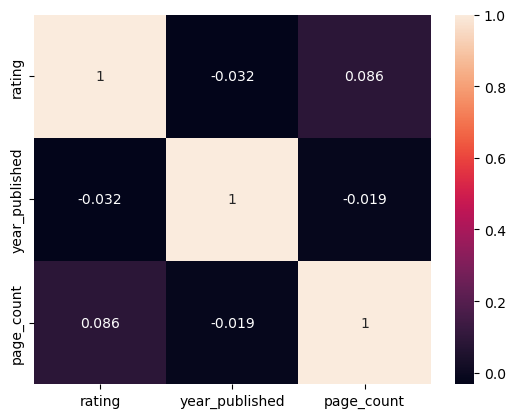

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns 
correlations_matrix = book.corr()   
correlations_matrix

sns.heatmap(correlations_matrix, annot=True)
plt.show()

As shown above there is no strong correlation between the numeric values in the matrix

##### Looking at the page_count in relation to the ratings 

<Figure size 2000x2000 with 0 Axes>

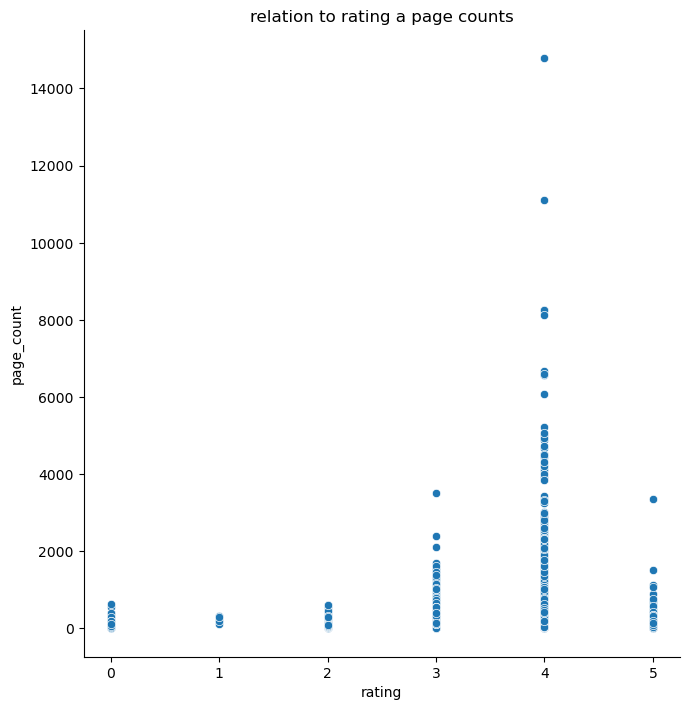

In [74]:
plt.figure(figsize = (20,20))
ax = sns.relplot(data = book, x = "rating",y="page_count",sizes = (200,200),height = 7)
plt.title('relation to rating a page counts')
ax.set_axis_labels("rating","page_count")

As shown above, the book with the 4 ratings have the highest book page count. 

In [75]:
book

,title,author,rating,genre,description,year_published,isbn,page_count,image_link
0,Gilead,Marilynne Robinson,3,Fiction,A NOVEL THAT READERS and critics have been eag...,2004,9780002005883,247,http://books.google.com/books/content?id=KQZCP...
3,Rage of angels,Sidney Sheldon,3,Fiction,"A memorable, mesmerizing heroine Jennifer -- b...",1993,9780006178736,512,http://books.google.com/books/content?id=FKo2T...
12,Warhost of Vastmark,Janny Wurts,4,Fiction,"Tricked once more by his wily half-brother, Ly...",1995,9780006482079,522,http://books.google.com/books/content?id=uOL0f...
35,Ocean Star Express,Mark Haddon;Peter Sutton,3,Juvenile Fiction,Joe and his parents are enjoying a summer holi...,2002,9780006646006,32,http://books.google.com/books/content?id=I2QZA...
54,Taken at the Flood,Agatha Christie,3,Fiction,A Few Weeks After Marrying An Attractive Young...,2002,9780007121014,352,http://books.google.com/books/content?id=3gWlx...
...,...,...,...,...,...,...,...,...,...
48514,Algedonic,R.H. Sin (Goodreads Author),3,Poetry,"Bestselling poet r.h. Sin, author of the Whisk...",2017,9781449494223,128,https://i.gr-assets.com/images/S/compressed.ph...
48515,Arafel's Saga,C.J. Cherryh (Goodreads Author),3,Fantasy,"Journey to a transitional time in the world, a...",1983,9781111493820,408,https://i.gr-assets.com/images/S/compressed.ph...
48516,Theodosia and the Last Pharaoh,R.L. LaFevers (Goodreads Author),4,Fantasy,"In this fourth book in the series, Theodosia s...",2011,9780547390185,400,https://i.gr-assets.com/images/S/compressed.ph...
48520,Attracted to Fire,DiAnn Mills (Goodreads Author),4,Christian Fiction,Special Agent Meghan Connors' dream of one day...,2011,9781414348643,416,https://i.gr-assets.com/images/S/compressed.ph...


##### Creating a copy of the dataframe and then exporting it to a CSV

In [76]:
final_data = book.copy()

In [77]:
final_data.to_csv('final_data.csv')

### LA FIN pour Phase 2